In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [2]:
df = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.columns = ['SerialNo', 'GRE_Score', 'TOEFL_Score', 'Uni_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']
df.set_index('SerialNo', inplace = True)
df.head()

,GRE_Score,TOEFL_Score,Uni_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
SerialNo,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 8)

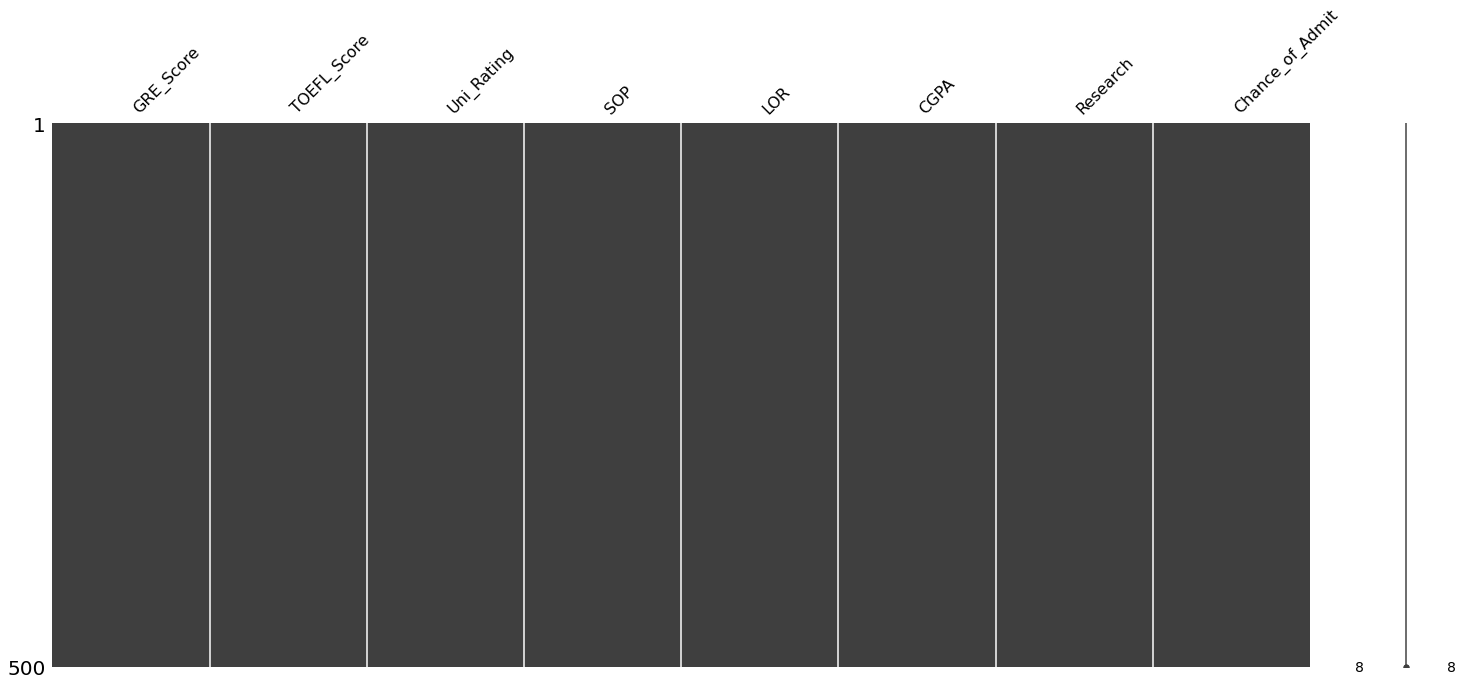

In [4]:
import missingno
missingno.matrix(df)

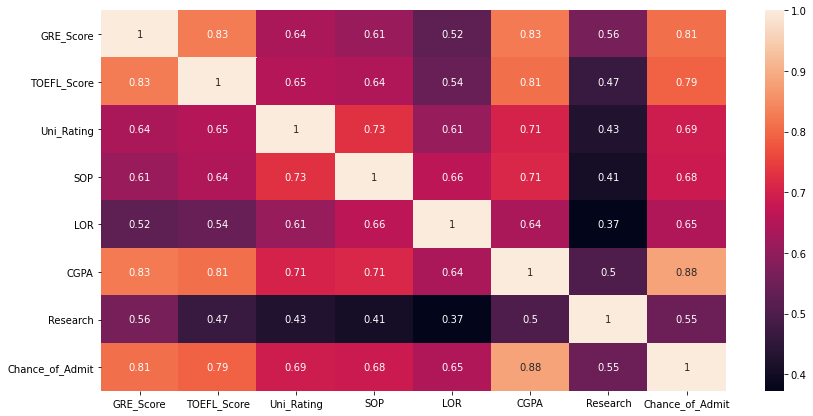

In [5]:
plt.figure(figsize = (14,7))

sns.heatmap(df.corr(), annot = True)


In [6]:
# Chance of admission shows strong correlation with CGPA, Toefl score and GRE score

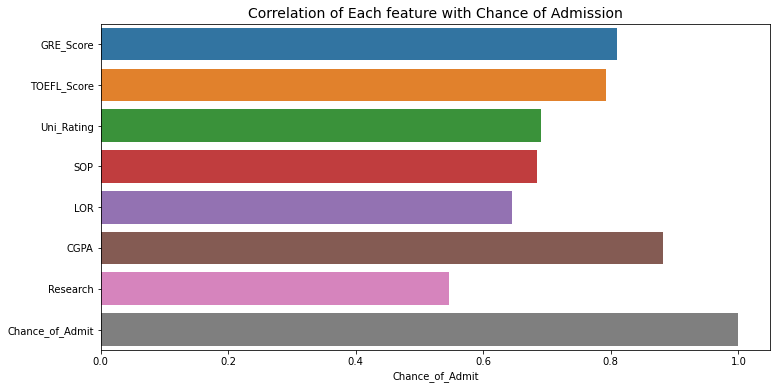

In [7]:
plt.figure(figsize = (12,6))
plt.title('Correlation of Each feature with Chance of Admission', fontsize = 14)
sns.barplot(x = df.corr()['Chance_of_Admit'], y = df.columns)

In [8]:
for i, col in enumerate(df.columns):
    print(i, col, '-', df[col].dtype)

0 GRE_Score - int64
1 TOEFL_Score - int64
2 Uni_Rating - int64
3 SOP - float64
4 LOR - float64
5 CGPA - float64
6 Research - int64
7 Chance_of_Admit - float64


# **Exploratory Data Analysis**

**1. Research**

Counting the number of students in each category


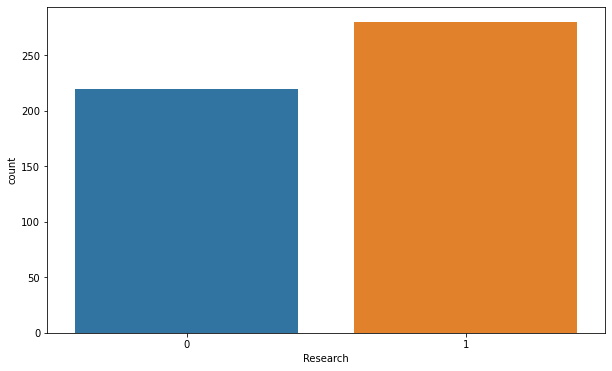

In [9]:
print('Counting the number of students in each category')
plt.figure(figsize = (10,6))
sns.countplot(x = 'Research', data = df)

Text(0, 0.5, 'Chance of Admission')

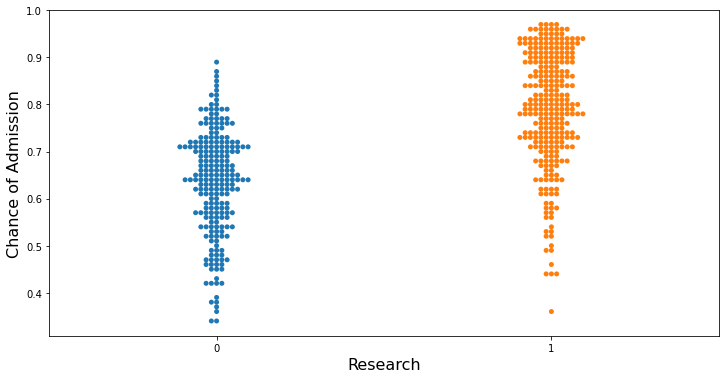

In [10]:
plt.figure(figsize = (12,6))
sns.swarmplot(x = df['Research'], y = df['Chance_of_Admit'])
plt.xlabel('Research', fontsize=16)
plt.ylabel('Chance of Admission', fontsize = 16)


Text(0, 0.5, 'Chance of Admission')

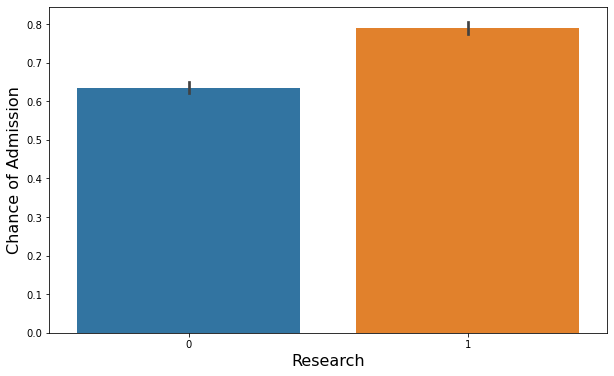

In [11]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['Research'], y = df['Chance_of_Admit'])
plt.xlabel('Research', fontsize=16)
plt.ylabel('Chance of Admission', fontsize = 16)

In [12]:
df[['Research','Uni_Rating', 'Chance_of_Admit']].groupby(['Research'], as_index = True).mean()

,Uni_Rating,Chance_of_Admit
Research,,
0,2.563636,0.634909
1,3.546429,0.789964


Students with Research opt have graduated from better rated universities and have higher chances of admission

**2. CGPA**

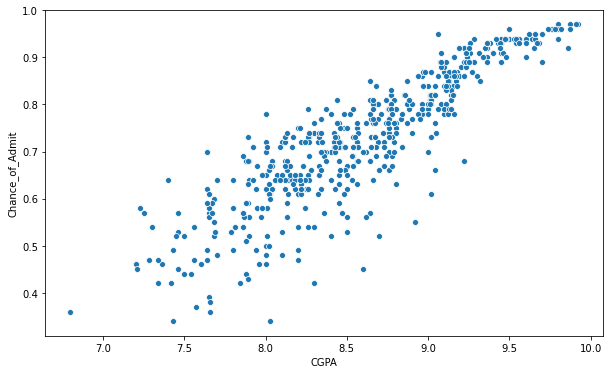

In [13]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['CGPA'], y = df['Chance_of_Admit'])

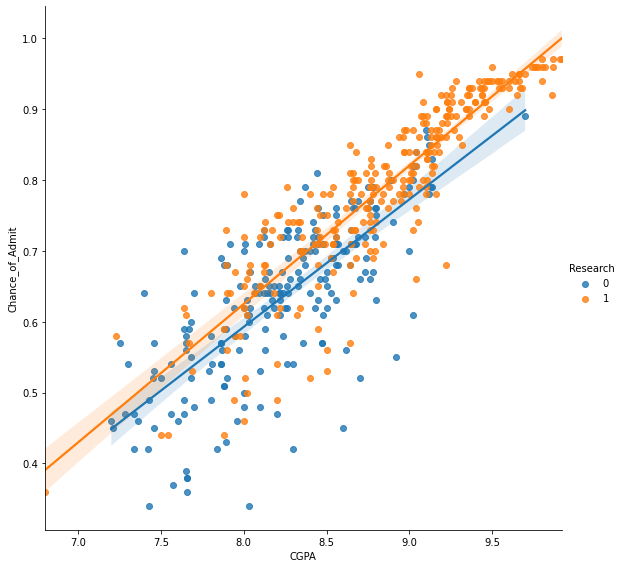

In [14]:

sns.lmplot(data = df, x = 'CGPA', y = 'Chance_of_Admit', hue = 'Research', height = 8)


In [15]:
bins = np.linspace(min(df['CGPA']), max(df['CGPA']), 5)
group_names = [1,2,3,4]
df['CGPA_binned'] = pd.cut(df['CGPA'], bins, labels = group_names, include_lowest = True)

Text(0, 0.5, 'Chance of admission')

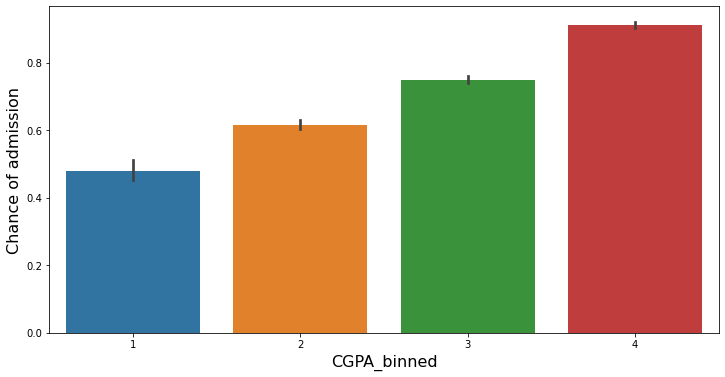

In [16]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['CGPA_binned'], y = df['Chance_of_Admit'])
plt.xlabel('CGPA_binned', fontsize = 16)
plt.ylabel('Chance of admission', fontsize = 16)

In [17]:
df['CGPA_binned'] = df['CGPA_binned'].astype(int)
print(df['CGPA_binned'].dtype)

int64


3. LOR

In [18]:
df[['LOR', 'Chance_of_Admit']].groupby('LOR').mean()

,Chance_of_Admit
LOR,
1.0,0.420000
1.5,0.550000
2.0,0.568261
2.5,0.640600
3.0,0.668485
3.5,0.723023
4.0,0.764149
4.5,0.831905
5.0,0.872600


Text(0, 0.5, 'Chance of admission')

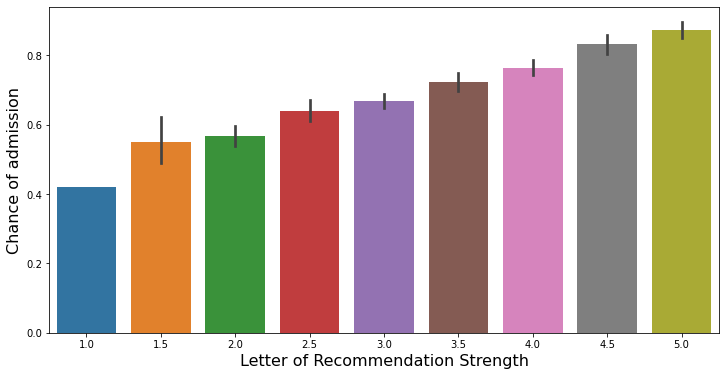

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['LOR'], y = df['Chance_of_Admit'])
plt.xlabel('Letter of Recommendation Strength', fontsize = 16)
plt.ylabel('Chance of admission', fontsize = 16)

4. SOP

In [20]:
df[['SOP', 'Chance_of_Admit']].groupby('SOP').mean()

,Chance_of_Admit
SOP,
1.0,0.538333
1.5,0.546400
2.0,0.589535
2.5,0.645312
3.0,0.678500
3.5,0.712045
4.0,0.782809
4.5,0.850000
5.0,0.885000


Text(0, 0.5, 'Chance of admission')

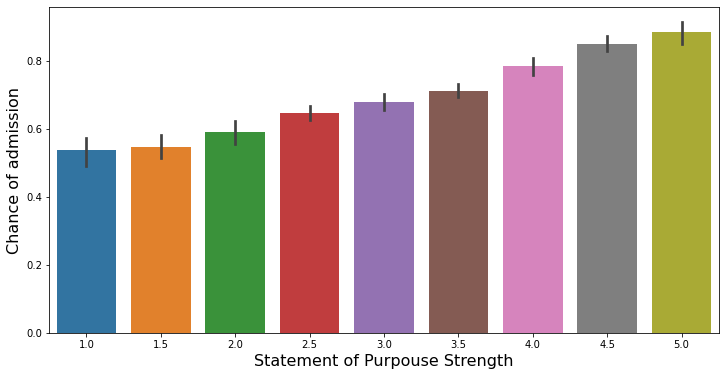

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['SOP'], y = df['Chance_of_Admit'])
plt.xlabel('Statement of Purpouse Strength', fontsize = 16)
plt.ylabel('Chance of admission', fontsize = 16)

5. University Rating

Text(0, 0.5, 'Chance of Admission')

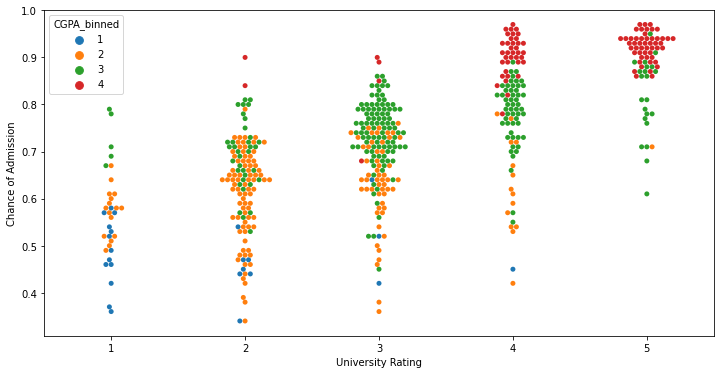

In [22]:
plt.figure(figsize = (12, 6))
sns.swarmplot(x = df['Uni_Rating'] ,y = df['Chance_of_Admit'], hue = df['CGPA_binned'])
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')

Text(0, 0.5, 'Chance of Admission')

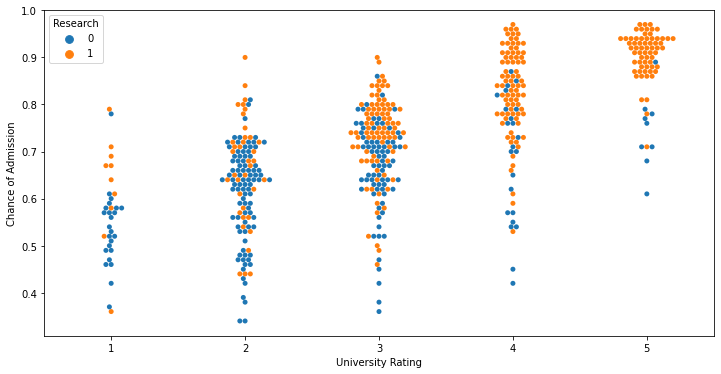

In [23]:
plt.figure(figsize = (12, 6))
sns.swarmplot(x = df['Uni_Rating'] ,y = df['Chance_of_Admit'], hue = df['Research'])
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')

Students graduating from better rated universities show greater chances of admission

In [24]:
df[['Uni_Rating', 'Chance_of_Admit', 'CGPA_binned']].corr()

,Uni_Rating,Chance_of_Admit,CGPA_binned
Uni_Rating,1.000000,0.690132,0.673872
Chance_of_Admit,0.690132,1.000000,0.826434
CGPA_binned,0.673872,0.826434,1.000000


6. TOEFL

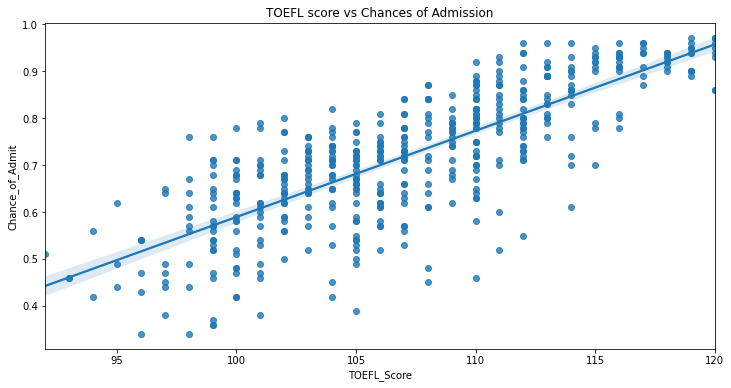

In [25]:
plt.figure(figsize = (12,6))
plt.title('TOEFL score vs Chances of Admission')
sns.regplot(x = df['TOEFL_Score'], y = df['Chance_of_Admit'])

7. GRE

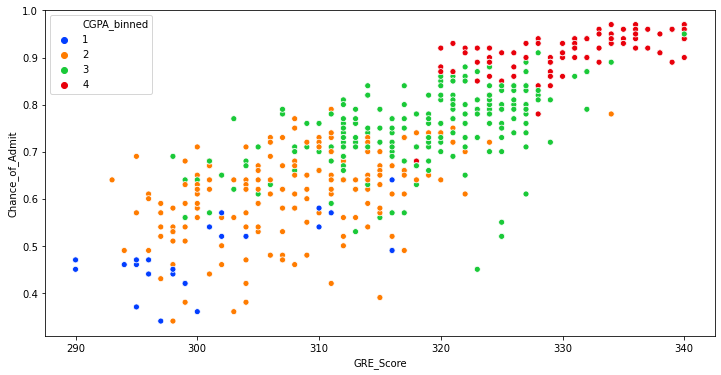

In [26]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = df['GRE_Score'], y = df['Chance_of_Admit'], hue = df['CGPA_binned'], palette = sns.color_palette('bright', 4))

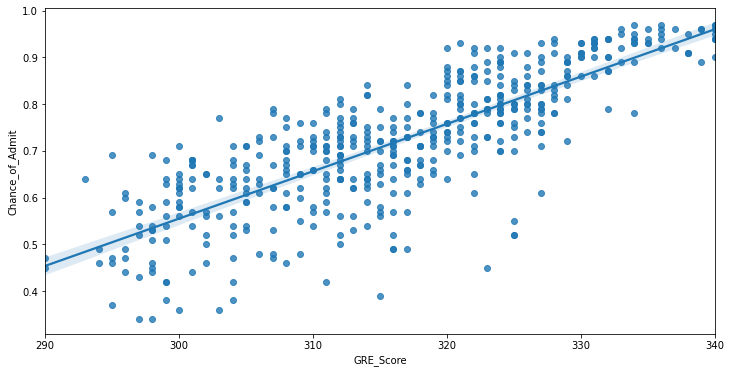

In [27]:
plt.figure(figsize = (12,6))
sns.regplot(x = df['GRE_Score'], y = df['Chance_of_Admit'])

# Model Development

In [28]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV

In [29]:
features = ['GRE_Score', 'TOEFL_Score', 'Uni_Rating', 'SOP', 'LOR', 'Research', 'CGPA']
X = df[features].copy()
X.head()


,GRE_Score,TOEFL_Score,Uni_Rating,SOP,LOR,Research,CGPA
SerialNo,,,,,,,
1,337,118,4,4.5,4.5,1,9.65
2,324,107,4,4.0,4.5,1,8.87
3,316,104,3,3.0,3.5,1,8.00
4,322,110,3,3.5,2.5,1,8.67
5,314,103,2,2.0,3.0,0,8.21


In [30]:
scalar = preprocessing.StandardScaler()
scalar.fit(X)
X = scalar.transform(X)
X

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         0.88640526,  1.77680627],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.88640526,  0.48585943],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
         0.88640526, -0.95404281],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         0.88640526,  1.62785086],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -1.12815215, -0.24236699],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
        -1.12815215,  0.76721964]])

In [31]:
def check_model_accuracy(model, X, y):
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'r2')
    return scores.mean()

In [32]:
def check_model_error(model, X, y):
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
    return scores.mean()

1. KNN

In [33]:
parameters_knn = {
    'n_neighbors':[i for i in range(5,25)],
    'weights':['uniform','distance'],
    'metric':['euclidean', 'manhattan']
}
randm_knn = RandomizedSearchCV(estimator = KNeighborsRegressor(), param_distributions = parameters_knn, cv = 5, n_iter = 15, n_jobs = -1, scoring = 'r2')
randm_knn.fit(X,df.Chance_of_Admit)


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=15, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24],
                                        'weights': ['uniform', 'distance']},
                   scoring='r2')

In [34]:
print('Best KNN parameters:', randm_knn.best_params_)
print('Best KNN Accuracy:', randm_knn.best_score_)
final_knn_model = KNeighborsRegressor(weights = randm_knn.best_params_['weights'], n_neighbors = randm_knn.best_params_['n_neighbors'], metric = randm_knn.best_params_['metric'] )
print('Error:', -1*check_model_error(final_knn_model, X, df.Chance_of_Admit))

Best KNN parameters: {'weights': 'distance', 'n_neighbors': 21, 'metric': 'euclidean'}
Best KNN Accuracy: 0.7720840084050912
Error: 0.048665721035642526


2. Random Forests

In [35]:
parameters_rf = {
    'n_estimators' : [ i for i in range(100,1001,100)],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [1,2,5,10] #The minimum number of samples required to be at a leaf node.
}
randm_rf = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = parameters_rf, cv = 5, n_iter = 15, n_jobs = -1, scoring = 'r2')
randm_rf.fit(X, df.Chance_of_Admit)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='r2')

In [36]:
print('Best RandomForests Parameters:', randm_rf.best_params_)
print('Best RandomForests Score:', randm_rf.best_score_)
final_randomforests_model = RandomForestRegressor(n_estimators = randm_rf.best_params_['n_estimators'], min_samples_leaf = randm_rf.best_params_['min_samples_leaf'], max_features = randm_rf.best_params_['max_features'])
print('Error:', -1*check_model_error(final_randomforests_model, X, df.Chance_of_Admit))

Best RandomForests Parameters: {'n_estimators': 900, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best RandomForests Score: 0.7978900795014698
Error: 0.045944657226072105


3. Linear Regression

In [37]:
linearRegression = LinearRegression()
print('Best linear Regression score:', check_model_accuracy(linearRegression, X, df.Chance_of_Admit))
print('Error:', -1*check_model_error(linearRegression, X, df.Chance_of_Admit))

Best linear Regression score: 0.8108015220863883
Error: 0.044899158828110054


4. Gradient Boosting Regressor

In [38]:
parameters_gb = {
    'learning_rate' : np.arange(0.1,0.91,0.1),
    'n_estimators' : range(100,1001,100),
    'max_depth' : range(2,6),
    'max_features' : ['auto', 'sqrt', 'log2',None]
    
}
randm_gb = RandomizedSearchCV(estimator = GradientBoostingRegressor(), param_distributions = parameters_gb, cv = 5, n_iter = 15, n_jobs = -1, scoring = 'r2')
randm_gb.fit(X, df.Chance_of_Admit)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': range(2, 6),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'n_estimators': range(100, 1001, 100)},
                   scoring='r2')

In [39]:
print('Best GB parameters:', randm_gb.best_params_)
print('Best GB score:', randm_gb.best_score_)
final_GB_model = GradientBoostingRegressor(n_estimators = randm_gb.best_params_['n_estimators'], max_features = randm_gb.best_params_['max_features'], max_depth = randm_gb.best_params_['max_depth'], learning_rate = randm_gb.best_params_['learning_rate'])
print('Error:', -1*check_model_error(final_GB_model, X, df.Chance_of_Admit))

Best GB parameters: {'n_estimators': 800, 'max_features': 'log2', 'max_depth': 2, 'learning_rate': 0.1}
Best GB score: 0.7608709486404186
Error: 0.04951824568456058


In [40]:
scores = []
models = [final_knn_model, final_randomforests_model, linearRegression, final_GB_model]
for model in models:
    scores.append(check_model_accuracy(model, X, df.Chance_of_Admit))
    

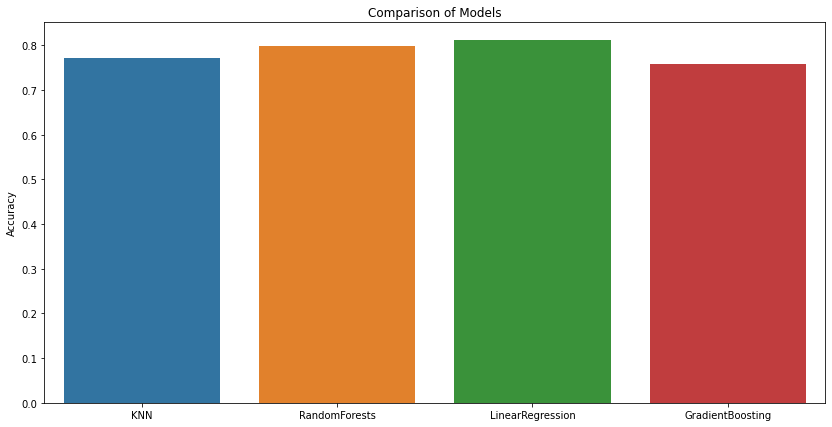

In [41]:
plt.figure(figsize = (14,7))
plt.title('Comparison of Models')
X = ['KNN', 'RandomForests', 'LinearRegression', 'GradientBoosting']
plt.ylabel('Accuracy')
sns.barplot(x=X, y=scores)